In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-54db96bd-a2e4-5b6a-8535-5ef5e26b321d)


In [ ]:
!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
!sudo unzip ninja-linux.zip -d /usr/local/bin/
!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force
!rm ninja-linux.zip

In [4]:
root = '/content/drive/MyDrive/repos/art-style-challenge' # update to own root directory
root = '/content/drive/MyDrive'

In [5]:
import sys
import os

# pls update root accordingly
%cd "/content/drive/MyDrive/repos/art-style-challenge/extern/stylegan2-ada-pytorch"

library_paths = ['.']

import dnnlib
import legacy

for p in library_paths:
    if p not in sys.path:
        sys.path.append(p)

# pls update root accordingly
%cd "/content/drive/MyDrive/repos/art-style-challenge/src"

import evaluator as evaluator

import matplotlib.pyplot as plt
import cv2

%load_ext autoreload
%autoreload 2

/content/drive/MyDrive/repos/art-style-challenge/extern/stylegan2-ada-pytorch
/content/drive/MyDrive/repos/art-style-challenge/src


# Model Evaluation

## First Find out best FID from Training run

In [19]:
art_style = 'one_piece_male'
csv_path = f'{root}/data/training-runs/{art_style}/fid.csv'
evaluator.test_fid(csv_path, art_style)

,fid,ticks,name
30,66.595849,150,one_piece_male


## Set Parameters

In [9]:
art_style = 'fire_emblem_male_256'
base_model = f'{root}/data/nvidia-ada-models/ffhq256.pkl' # all trained models are based on the ffhq256.pkl
trained_model = f'{root}/data/training-runs/{art_style}'

bestFID = 17 # index of the best FID

eval = evaluator.Evaluator(art_style, base_model, trained_model, bestFID) #might take a few seconds to generate the networks

In [ ]:
outdir = f'/content/drive/MyDrive/repos/art-style-challenge/images/{art_style}'

if not os.path.exists(outdir):
  os.makedirs(outdir)
  print('Created new directory!')

Created new directory!


## Experiment with truncation trick
The truncation trick can be used to achieve better results by pushing values closer to the mean of our learned distribution. However choosing $\psi$ too low will result in less diversity.

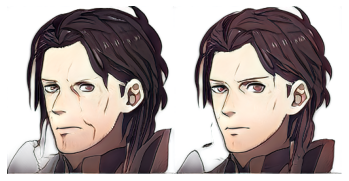

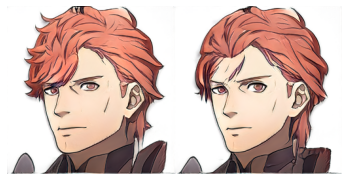

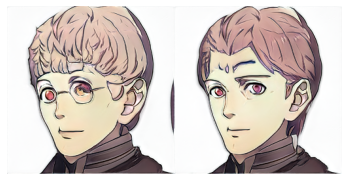

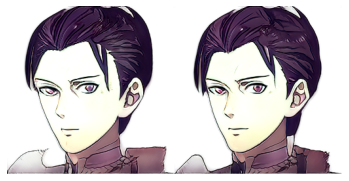

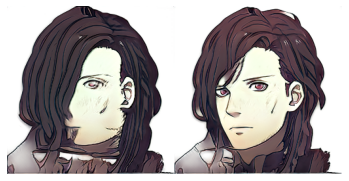

In [10]:
for i in range(5):
  img = eval.compare_truncation(1.0, 0.5)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

## Choose your seeds
This step can be skiped and the seed will be chosen randomly.

In [11]:
seeds = []

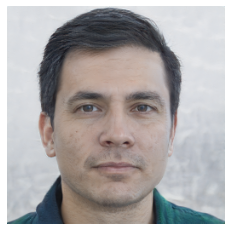

In [12]:
img, z = eval.generate_seed()
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
seeds.append(z)
print(len(seeds)) # add seed if wanted

1


In [ ]:
eval.seeds = seeds

## Visualize Training with Image Stack 

In [ ]:
img = eval.training_stack()

/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:90: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img_rows.append(np.hstack((img for img in original_img)))
/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img_rows.append(np.hstack((i for i in img_row)))
/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img_rows.append(np.hstack((i for i 

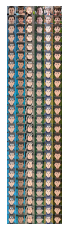

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# save output 
cv2.imwrite(f'{outdir}/stack.png', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

True

## Visualize Training with Video

In [ ]:
eval.make_video(outdir)

/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:135: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  frame = np.hstack((i for i in img_row))
/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:135: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  frame = np.hstack((i for i in img_row))
/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:135: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  frame = np.hstack((i for i in img_row))
/content/drive/MyDr

## Blend and Mix Styles

/content/drive/MyDrive/repos/art-style-challenge/src/evaluator.py:160: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img_stack = np.hstack((i for i in results))


(-0.5, 1535.5, 511.5, -0.5)

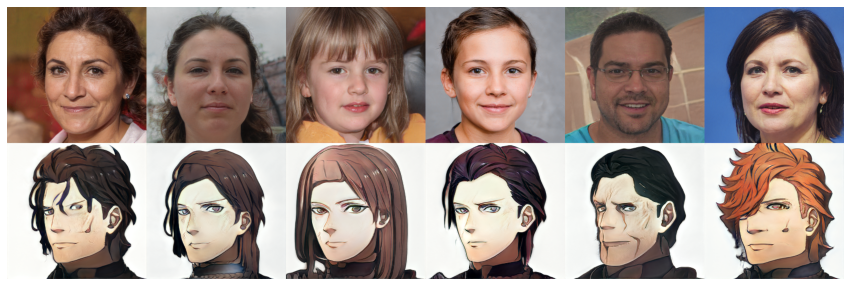

In [15]:
mix1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
mix2 = [1-m for m in mix1]

img = eval.generate_mixed_styles(mix1, mix2, sep=False)
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(img, aspect='auto')
ax.axis('off')

In [ ]:
# save output 
cv2.imwrite(f'{outdir}/mix1.png', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

True

In [ ]:
!pip list 

In [ ]:
import pandas as pd

df =pd.read_csv('/content/survey.csv').iloc[:24]

df

,Timestamp,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24
0,08/01/2023 21:14:41,A1,B1,C2,D4,A3,F3,F1,B2,C2,...,A4,D2,E3,F4,B4,A2,B3,C3,A4,D3
1,08/01/2023 21:19:17,A2,B1,C2,D4,A4,F3,F1,B2,C2,...,A4,D2,E3,F4,E4,A2,B3,3,4,D3
2,08/01/2023 21:20:39,A1,B1,C2,D4,A3,F3,F1,B2,C1,...,A4,D2,E3,F4,B4,A2,B3,A3,A4,D3
3,08/01/2023 21:21:40,A1,B2,C2,D4,a3,e3,f1,b2,c2,...,a4,d2,e3,f4,b4,a2,b3,e3,c4,d3
4,08/01/2023 21:23:21,A2,B1,C2,D4,A3,F4,F1,B2,C1,...,A4,D2,E3,F4,B3,A2,B3,C3,4,D3
5,08/01/2023 21:23:44,A1,B1,C2,D4,A4,F4,F1,B2,C2,...,A4,D2,E3,F4,B4,A2,B3,C3,D4,D3
6,08/01/2023 21:33:06,A1,B1,C2,D4,A4,F4,F1,B2,C2,...,A4,D2,E4,F4,B4,A2,B3,C3,C4,D3
7,08/01/2023 21:47:49,A1,B1,C2,4,A3,F4,F1,B2,C1,...,4,D2,E3,F4,B4,A2,3,3,4,D3
8,08/01/2023 21:51:59,A1,B1,C2,D3,A3,F4,F1,B2,C1,...,A3,D2,E4,F4,B3,A2,B4,A3,A4,D3
9,08/01/2023 21:57:30,A1,B1,C2,4,A4,F4,F1,B2,C1,...,3,D1,3,4,B4,A1,B2,3,A4,NaN


In [ ]:
df.iloc[-1]

Timestamp    09/01/2023 16:36:09
Q1                            A1
Q2                            B1
Q3                            C2
Q4                            D4
Q5                            A3
Q6                            F4
Q7                            F1
Q8                            B2
Q9                            C1
Q10                           E4
Q11                           F2
Q12                           D2
Q13                           E1
Q14                           E2
Q15                           A4
Q16                           D2
Q17                           E3
Q18                           F3
Q19                           B4
Q20                           A2
Q21                           B3
Q22                           C3
Q23                           A3
Q24                           D3
Name: 23, dtype: object

In [ ]:

true_val = {
  'Q1':  'A1',
  'Q2':  'B1',
  'Q3':  'C2',
  'Q4':  'D4',
  'Q5':  'A3',
  'Q6':  'F3',
  'Q7':  'F1',
  'Q8':  'B2',
  'Q9':  'C2',
  'Q10' :'E4',
  'Q11' :'F2',
  'Q12' :'D1',
  'Q13' :'E1',
  'Q14' :'E2',
  'Q15' :'A4',
  'Q16' :'D2',
  'Q17' :'E3',
  'Q18' :'F4',
  'Q19' :'B4',
  'Q20' :'A2',
  'Q21' :'B3',
  'Q22' :'C3',
  'Q23' :'C4',
  'Q24' :'D3'  
}
letter_dict = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
number_dict = {'1': 0, '2': 0, '3': 0, '4': 0}
total_sum = 0
letter_sum = 0
digit_sum = 0
for i, column in enumerate(df.columns):
  if column in ['Timestamp']:
    continue
  mask = df[column].str.lower()==true_val[column].lower()
  total_sum += mask.sum()
  letter = true_val[column].lower()[0]
  letter_mask = df[column].str.lower().str.contains(letter)
  letter_dict[letter.upper()] += letter_mask.sum()
  letter_sum += letter_mask.sum()
  digit = true_val[column].lower()[1]
  digit_mask = df[column].str.contains(digit)
  number_dict[digit] += digit_mask.sum()
  digit_sum += digit_mask.sum()
print('Total Average Precision:', total_sum/(24*24))
print('Person Average Precision:', letter_sum/(24*24))
print('Art Style Average Precision: ', digit_sum/(24*24))
for key, val in letter_dict.items():
  print(key, val/(24*4))
for key, val in number_dict.items():
  print(key, val/(24*6))

Total Average Precision: 0.7204861111111112
Person Average Precision: 0.8611111111111112
Art Style Average Precision:  0.8246527777777778
A 0.9270833333333334
B 0.9270833333333334
C 0.6354166666666666
D 0.8541666666666666
E 0.9166666666666666
F 0.90625
1 0.7152777777777778
2 0.9791666666666666
3 0.7638888888888888
4 0.8402777777777778


In [ ]:
type(df[column].str)

pandas.core.strings.accessor.StringMethods